In [72]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Right, that was easy ? Add some distorsion to your data to make the problem harder (like some quadratique distorsion)

In [73]:


# Genrate sinusoidal data with noise

def func(x):
    return np.sin(2 * np.pi * x)


size = 100
rng = np.random.RandomState(1234)
X = rng.uniform(0.0, 1.0, size)
y = func(X) + rng.normal(scale=0.1, size=size) + 2

X = X.reshape((100, 1))
y = y.reshape((100, 1))


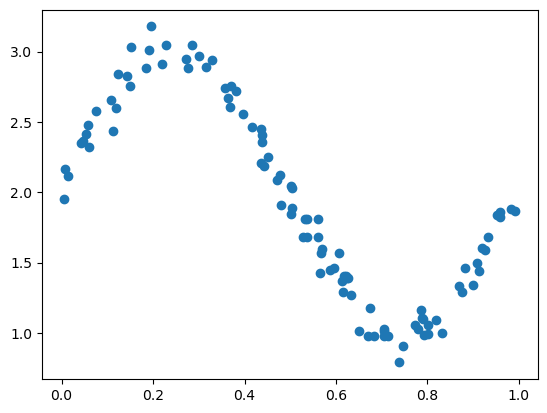

In [74]:
plt.scatter(X,y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

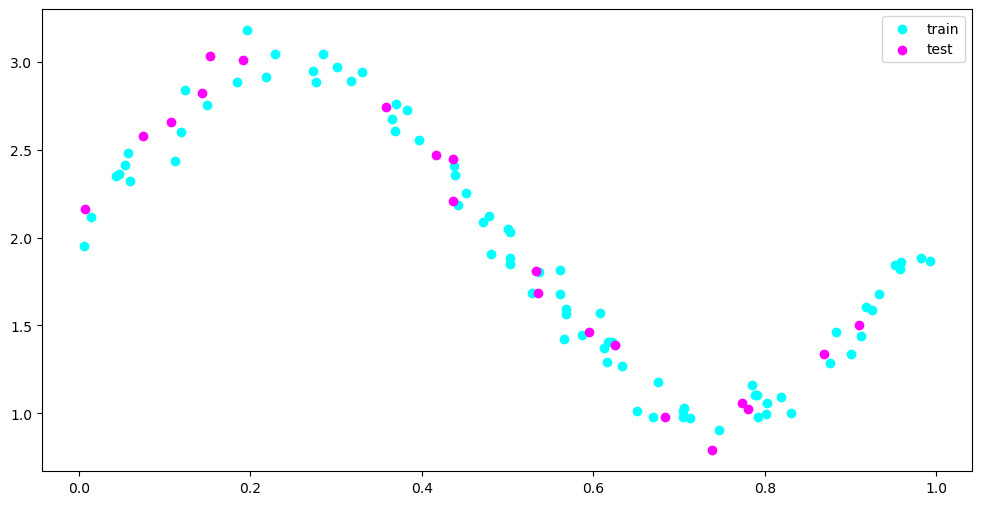

In [76]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train,y_train, color='cyan', label='train')
ax.scatter(X_test,y_test, color='magenta', label='test')
ax.legend();

# Create linear regression object
# predict data on your test set.

In [77]:
model = LinearRegression() #create a model
model.fit(X_train, y_train) # learn
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.5442820015986651
0.6862929117649934


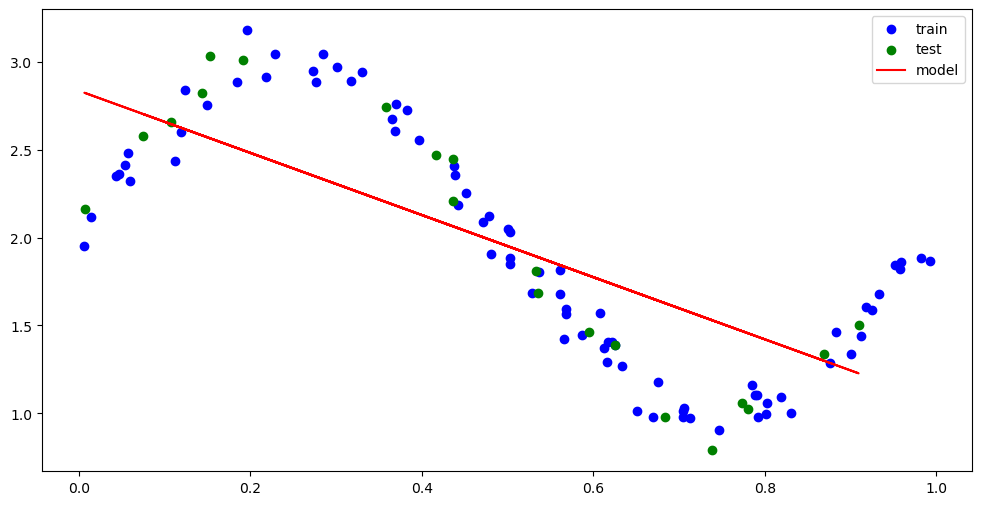

In [78]:
y_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train,y_train, color='b', label='train')
ax.scatter(X_test,y_test, color='g', label='test')
ax.plot(X_test,y_pred, color='red', label='model')

ax.legend()

In [79]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE

0.40331053787689103

In [80]:
import math
 
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
print(MSE)

Root Mean Square Error:

0.40331053787689103
0.16265938996254717


In [81]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degre = 2

model = make_pipeline(PolynomialFeatures(degre), Ridge())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


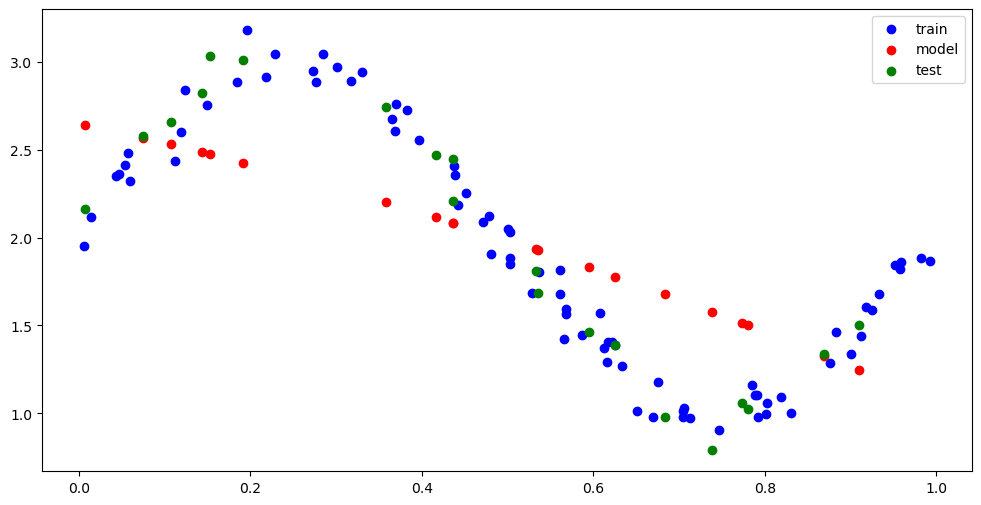

In [82]:
# graphique du résultat

y_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train,y_train, color='b', label='train')
ax.scatter(X_test,y_pred, color='red', label='model')
ax.scatter(X_test,y_test, color='g', label='test')


ax.legend()

Fit by cubic polynomial

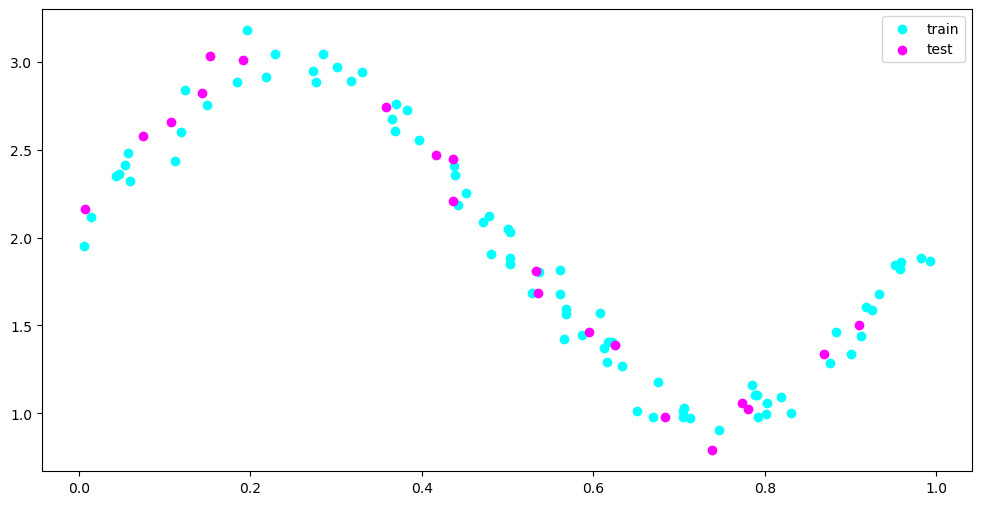

In [84]:
# Genrate sinusoidal data with noise

def func(x):
    return np.sin(2 * np.pi * x)


size = 100
rng = np.random.RandomState(1234)
X = rng.uniform(0.0, 1.0, size)
y = func(X) + rng.normal(scale=0.1, size=size) + 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train,y_train, color='cyan', label='train')
ax.scatter(X_test,y_test, color='magenta', label='test')
ax.legend();

Plot the true and predicted curves with log marginal likelihood (L)

ValueError: Expected 2D array, got 1D array instead:
array=[0.91212289 0.63372577 0.39720258 0.04735528 0.1193809  0.56119619
 0.05980922 0.53687819 0.87593263 0.47163253 0.50099513 0.56143308
 0.14983372 0.31683612 0.95142876 0.27259261 0.45164841 0.05387369
 0.70458131 0.50308317 0.50296683 0.70426097 0.80187218 0.50255956
 0.78873014 0.88264119 0.612149   0.65137814 0.4780938  0.71270203
 0.9331401  0.78535858 0.01376845 0.44214076 0.95813935 0.00620852
 0.27646426 0.38231745 0.21879211 0.43830988 0.79052413 0.66942174
 0.61744171 0.67488094 0.11189432 0.98200474 0.04332406 0.1239427
 0.62491671 0.81920207 0.30064171 0.18428708 0.95880176 0.32966845
 0.05711564 0.99208147 0.89996519 0.80214764 0.48035918 0.79196414
 0.19567518 0.70599757 0.92486763 0.56809865 0.62210877 0.56594464
 0.61539618 0.43772774 0.36882401 0.83100699 0.56840962 0.22921857
 0.74606341 0.91819808 0.36488598 0.28525096 0.58730363 0.37025075
 0.52822428 0.60719371].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

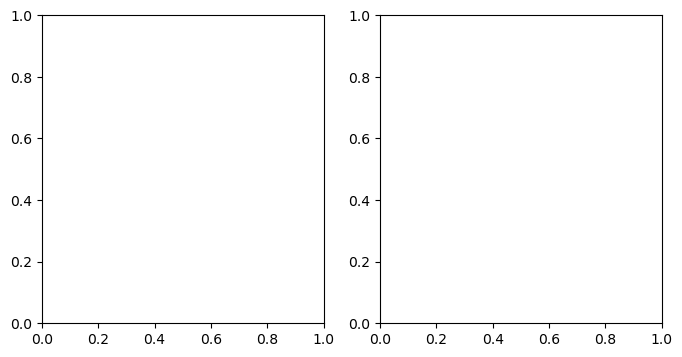

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Default values
    elif i == 1:
        init = [1.0, 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(X_test, func(X_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(X_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(X_test, ymean, color="red", label="predict mean")
    ax.fill_between(
        X_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std"
    )
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
        reg.alpha_, reg.lambda_, reg.scores_[-1]
    )
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()